# Preprocessing

In [1]:
# importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# chargement des donnees
data = pd.read_csv("Medical cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


# Previsualisation des donnees

In [3]:
# control des lignes dupliquees
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19.0,male,30.59,0.0,no,northwest,1639.5631


In [4]:
# supression des lignes dupliquees
data = data.drop_duplicates(keep="first")

In [5]:
# taille du jeu de donnees
data.shape

(1337, 7)

In [6]:
# control du type des colonnees
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# liste des colonnees
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Preprocessing

## gestion des donnees manquantes

In [8]:
# control des donnees manquantes
data.isna().sum()

age         9
sex         0
bmi         6
children    7
smoker      0
region      0
charges     0
dtype: int64

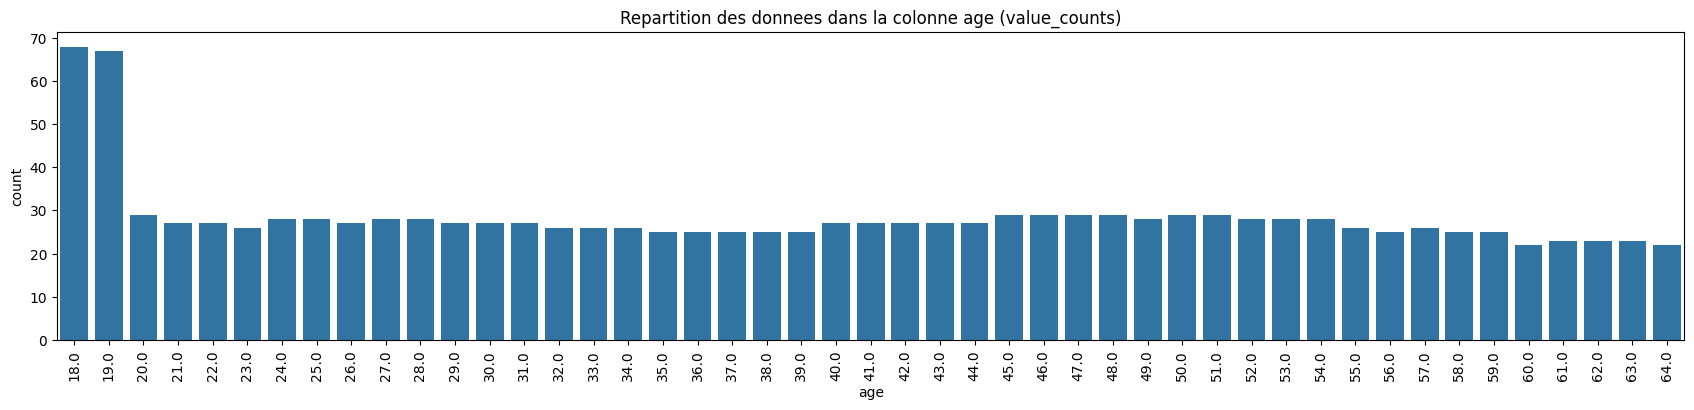

In [9]:
## gestion de la colonne : age
# control de l'etat de la colonne age
plt.figure(figsize=(21,4))
plt.title("Repartition des donnees dans la colonne age (value_counts)")
sns.countplot(data=data, x="age")
plt.xticks(rotation=90)
plt.show()

In [10]:
# control de la moyenne et de la mediane
print(f"Moyenne de la colonne age : {data.age.mean()} , Mediane de la colonne age : {data.age.median()}")

Moyenne de la colonne age : 39.26129518072289 , Mediane de la colonne age : 39.0


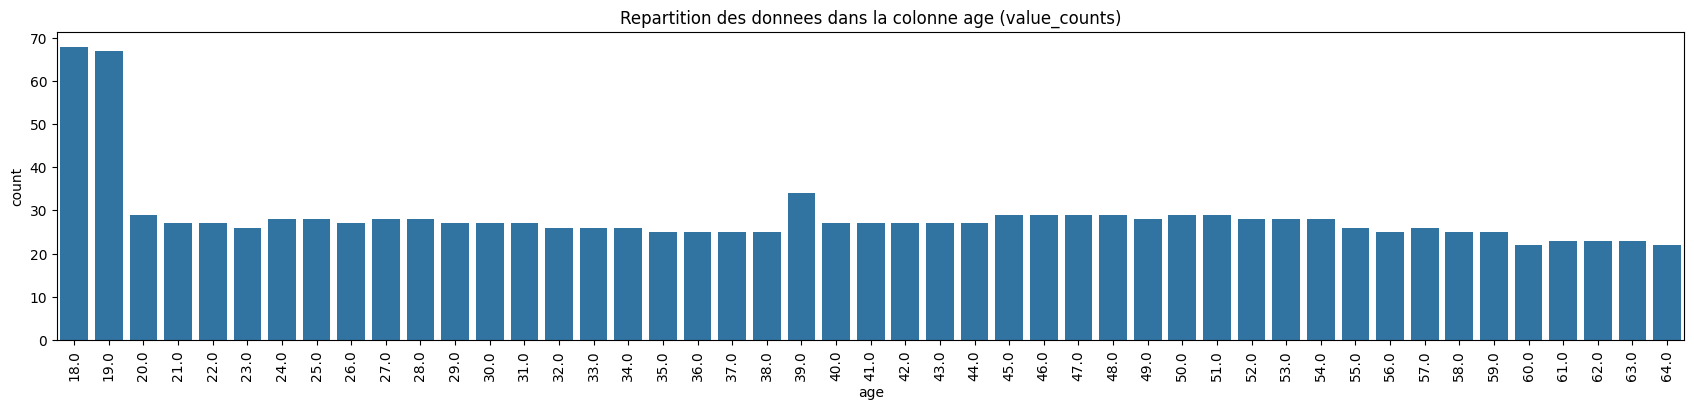

In [11]:
# ramener les valeurs manquantes a la mediane
data.age = data.age.fillna(data.age.median())

# visualisation
plt.figure(figsize=(21,4))
plt.title("Repartition des donnees dans la colonne age (value_counts)")
sns.countplot(data=data, x="age")
plt.xticks(rotation=90)
plt.show()

In [12]:
## gestion de la colonne : bmi
# control de la colonne bmi
dict(data.bmi.value_counts())

{32.3: 13,
 28.31: 9,
 34.1: 8,
 28.88: 8,
 30.8: 8,
 31.35: 8,
 30.495: 8,
 30.875: 8,
 27.36: 7,
 24.32: 7,
 27.645: 7,
 32.775: 7,
 32.11: 7,
 38.06: 7,
 33.33: 7,
 25.46: 7,
 34.8: 7,
 25.8: 7,
 35.2: 7,
 27.5: 6,
 35.53: 6,
 30.59: 6,
 26.41: 6,
 25.175: 6,
 28.595: 6,
 37.1: 6,
 27.74: 6,
 29.92: 6,
 33.63: 6,
 29.83: 6,
 30.115: 6,
 19.95: 6,
 31.73: 6,
 26.6: 6,
 33.0: 6,
 30.2: 6,
 23.655: 5,
 26.03: 5,
 26.695: 5,
 28.5: 5,
 23.21: 5,
 22.515: 5,
 33.155: 5,
 27.835: 5,
 23.18: 5,
 26.315: 5,
 29.7: 5,
 27.6: 5,
 28.785: 5,
 28.975: 5,
 30.4: 5,
 32.395: 5,
 33.345: 5,
 31.92: 5,
 36.85: 5,
 29.64: 5,
 25.3: 5,
 34.2: 5,
 28.025: 5,
 28.7: 5,
 25.08: 5,
 31.825: 5,
 33.66: 5,
 28.9: 5,
 24.7: 4,
 26.22: 4,
 32.68: 4,
 29.6: 4,
 31.065: 4,
 25.74: 4,
 33.44: 4,
 33.82: 4,
 25.84: 4,
 27.55: 4,
 31.79: 4,
 28.12: 4,
 29.735: 4,
 24.13: 4,
 27.83: 4,
 29.8: 4,
 28.215: 4,
 30.78: 4,
 22.61: 4,
 33.915: 4,
 31.13: 4,
 21.85: 4,
 27.1: 4,
 27.72: 4,
 36.3: 4,
 36.67: 4,
 35.625: 4

In [13]:
# remplacement par la moyenne
data.bmi = data.bmi.fillna(data.bmi.mean())

In [14]:
## gestion de la colonne : children
data.children.value_counts()

children
0.0    571
1.0    322
2.0    238
3.0    157
4.0     24
5.0     18
Name: count, dtype: int64

In [15]:
# remplacement des donnees manquantes par le mode
data.children = data.children.fillna(data.children.mode()[0]) # 0.0

In [16]:
# control finale
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## gestion des outlayers

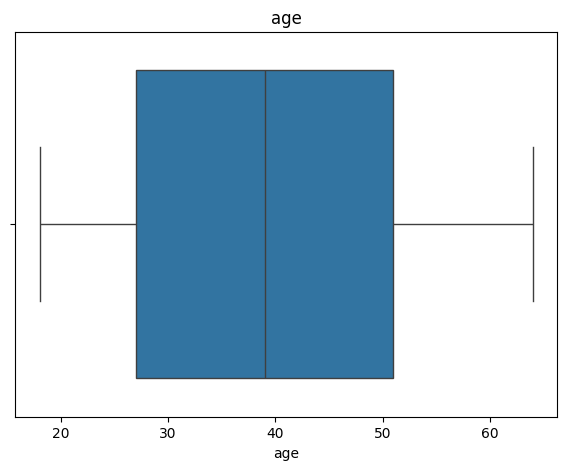

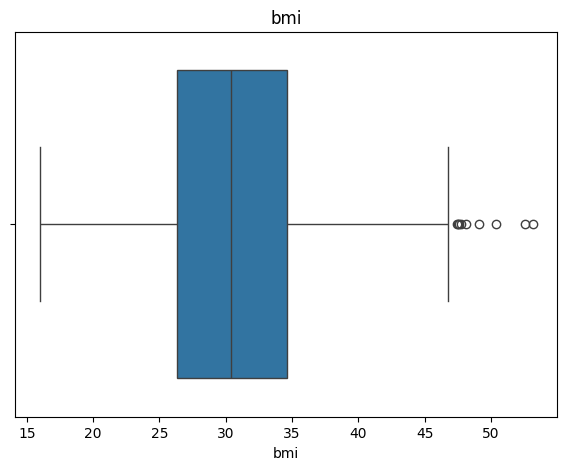

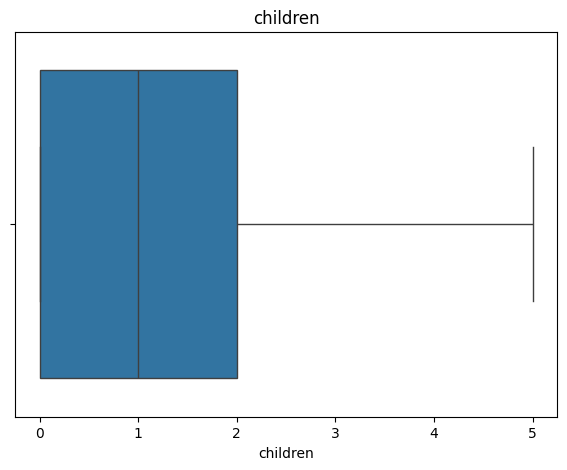

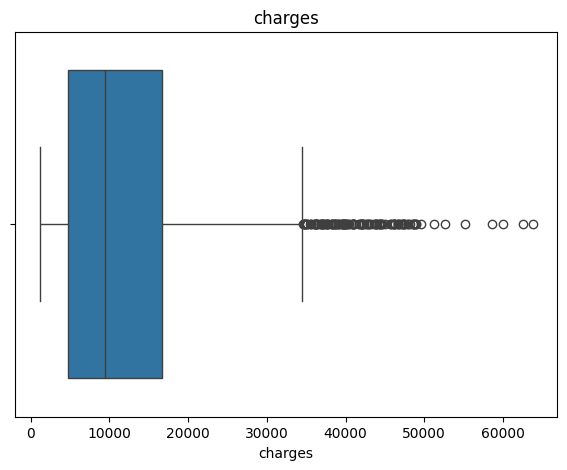

In [17]:
# control des outlayers
for i in list(data.select_dtypes(include=['int64', 'float64']).columns) : # liste des colonne numeriques
    plt.figure(figsize=(7,5))
    sns.boxplot(data=data, x=f"{i}")
    plt.title(f"{i}")
    plt.show()

In [18]:
## FONCTION DE DETERMINATION DES OUTLAYERS : METHODES "IGR" ##
def detect_outliers_iqr(column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    outlier_rate = (len(outliers) / len(data)) * 100
    
    print(f"Analysis for {column_name}:")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {outlier_rate:.2f}%")

In [19]:
# application a la colonne bmi
detect_outliers_iqr('bmi')

Analysis for bmi:
Lower bound: 13.89
Upper bound: 47.03
Number of outliers: 9
Percentage of outliers: 0.67%


In [20]:
# ramener les donnees aberantes a la borne superieur 
data.loc[data["bmi"] > 47.03 , "bmi"] = 47.03

In [21]:
# application a la colonne charges
detect_outliers_iqr('charges')

Analysis for charges:
Lower bound: -13120.72
Upper bound: 34524.78
Number of outliers: 139
Percentage of outliers: 10.40%


In [22]:
# outlayers continue et taux important : conservation jusqua un taux definie : 50.000
data.loc[data["charges"] > 50000 , "charges"] = 50000

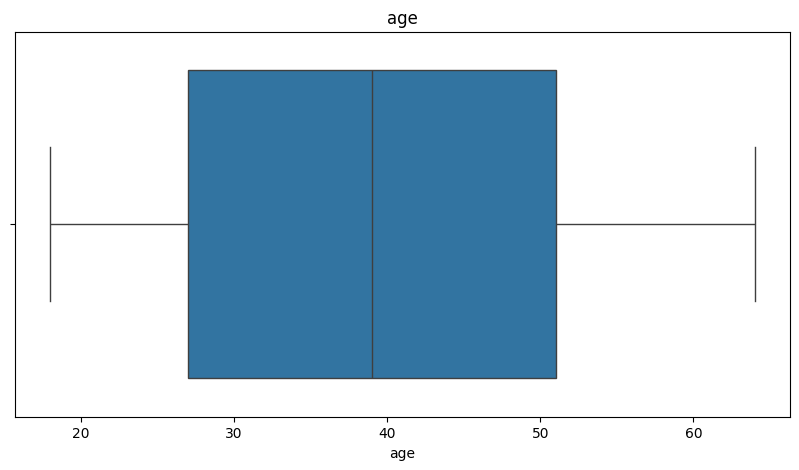

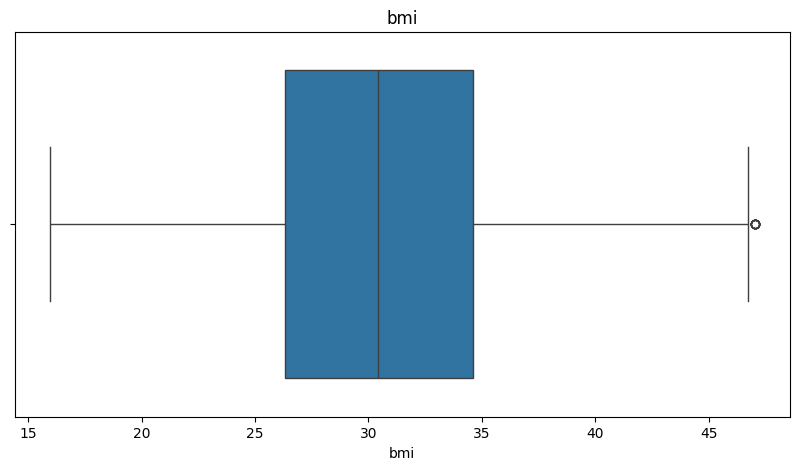

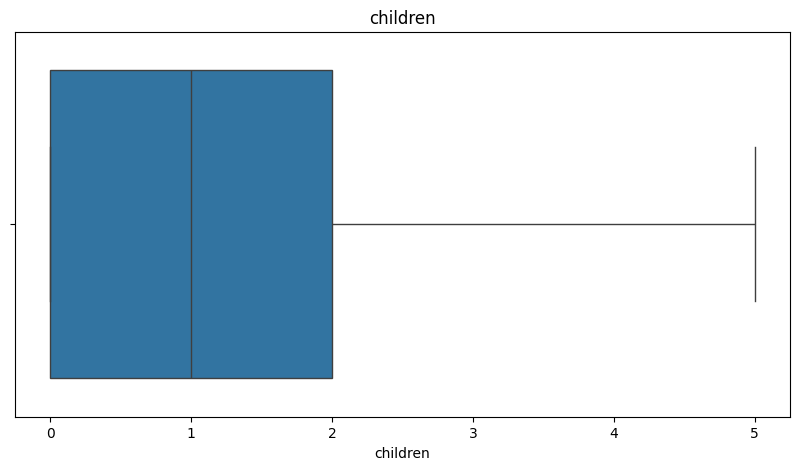

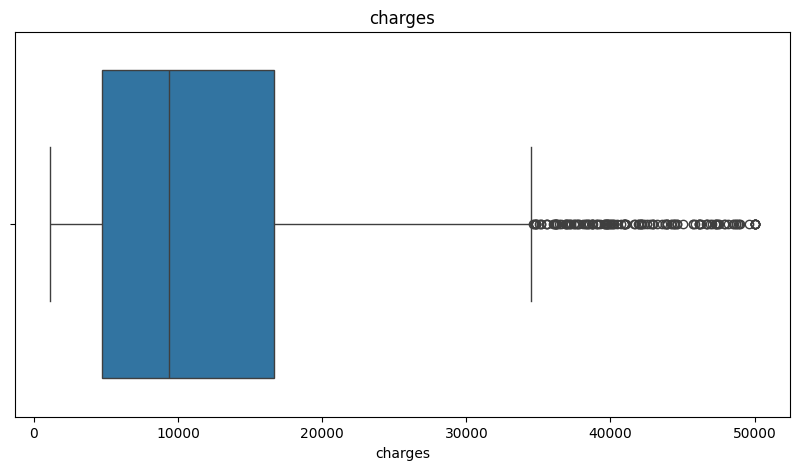

In [23]:
# control
for i in list(data.select_dtypes(include=['int64', 'float64']).columns) : # liste des colonne numeriques
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, x=f"{i}")
    plt.title(f"{i}")
    plt.show()

## controle et visualisation des donnees

In [24]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

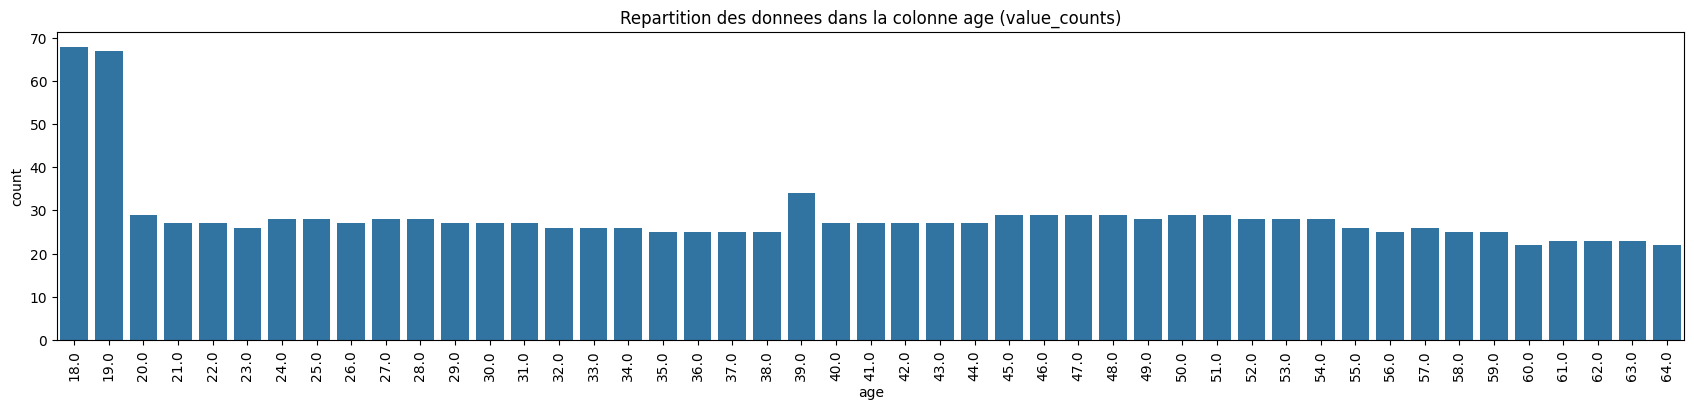

In [25]:
# control de la colonne age
plt.figure(figsize=(21,4))
plt.title("Repartition des donnees dans la colonne age (value_counts)")
sns.countplot(data=data, x="age")
plt.xticks(rotation=90)
plt.show()

In [26]:
# control de la colonne sex
data.sex.unique()

array(['female', 'male'], dtype=object)

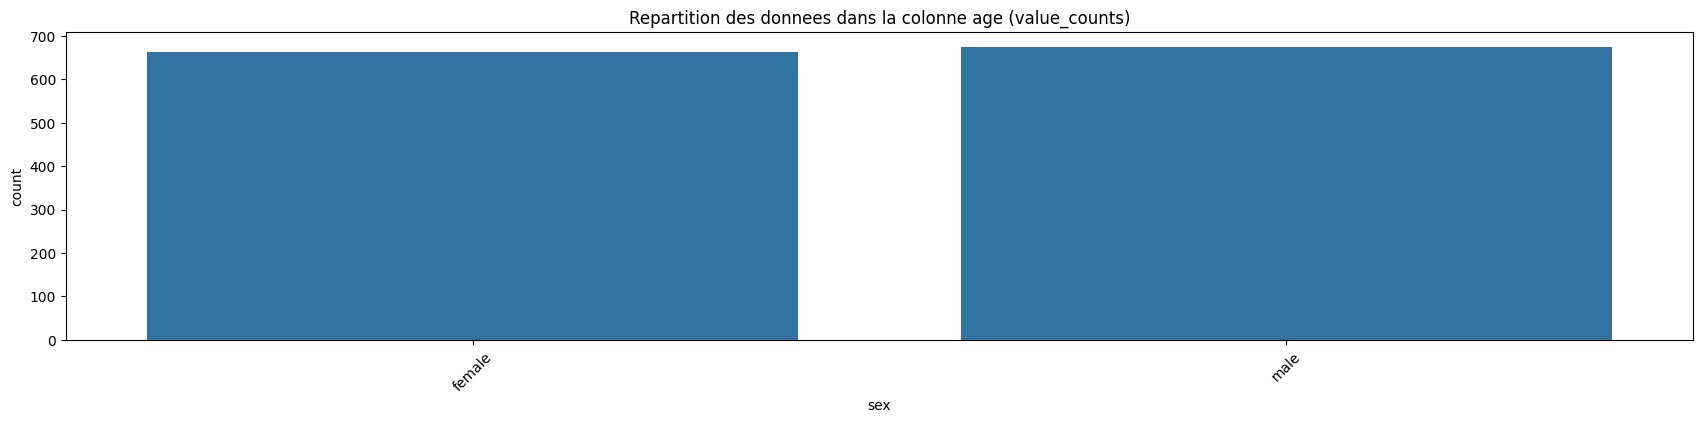

In [27]:
plt.figure(figsize=(21,4))
plt.title("Repartition des donnees dans la colonne age (value_counts)")
sns.countplot(data=data, x="sex")
plt.xticks(rotation=45)
plt.show()

In [28]:
# control de la colonne bmi
dict(data.bmi.value_counts())

{32.3: 13,
 47.03: 9,
 28.31: 9,
 30.8: 8,
 31.35: 8,
 30.875: 8,
 34.1: 8,
 28.88: 8,
 30.495: 8,
 38.06: 7,
 27.645: 7,
 34.8: 7,
 25.8: 7,
 35.2: 7,
 33.33: 7,
 24.32: 7,
 25.46: 7,
 32.775: 7,
 27.36: 7,
 32.11: 7,
 26.6: 6,
 27.5: 6,
 26.41: 6,
 28.595: 6,
 25.175: 6,
 31.73: 6,
 19.95: 6,
 29.83: 6,
 27.74: 6,
 33.63: 6,
 30.2: 6,
 37.1: 6,
 29.92: 6,
 35.53: 6,
 30.115: 6,
 30.59: 6,
 33.0: 6,
 30.65484973703982: 6,
 23.21: 5,
 22.515: 5,
 30.4: 5,
 26.315: 5,
 28.7: 5,
 26.695: 5,
 31.92: 5,
 28.025: 5,
 28.785: 5,
 33.345: 5,
 27.835: 5,
 29.64: 5,
 33.155: 5,
 27.6: 5,
 31.825: 5,
 33.66: 5,
 25.3: 5,
 36.85: 5,
 23.18: 5,
 26.03: 5,
 29.7: 5,
 34.2: 5,
 32.395: 5,
 28.5: 5,
 28.9: 5,
 28.975: 5,
 23.655: 5,
 25.08: 5,
 33.82: 4,
 32.68: 4,
 36.67: 4,
 35.86: 4,
 26.4: 4,
 35.815: 4,
 34.4: 4,
 36.3: 4,
 24.605: 4,
 30.5: 4,
 24.7: 4,
 29.735: 4,
 36.955: 4,
 30.78: 4,
 36.08: 4,
 28.215: 4,
 22.895: 4,
 24.795: 4,
 33.915: 4,
 24.13: 4,
 25.84: 4,
 29.26: 4,
 27.83: 4,
 34.4

<Axes: xlabel='bmi'>

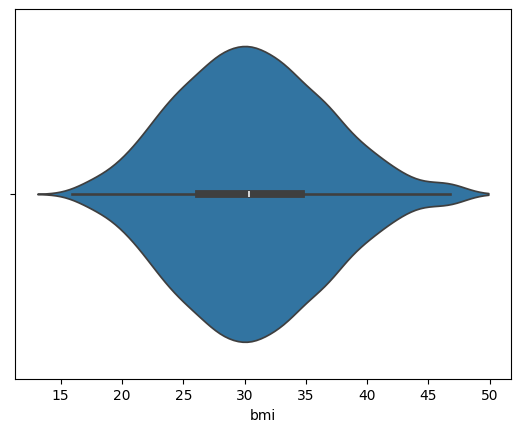

In [29]:
sns.violinplot(data=data, x="bmi")

In [30]:
# control de la colonne children
data.children.value_counts()

children
0.0    578
1.0    322
2.0    238
3.0    157
4.0     24
5.0     18
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='count'>

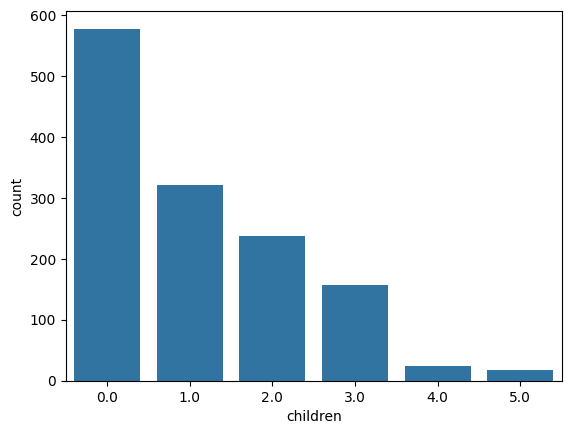

In [31]:
sns.countplot(data=data, x="children")

<Axes: xlabel='smoker', ylabel='count'>

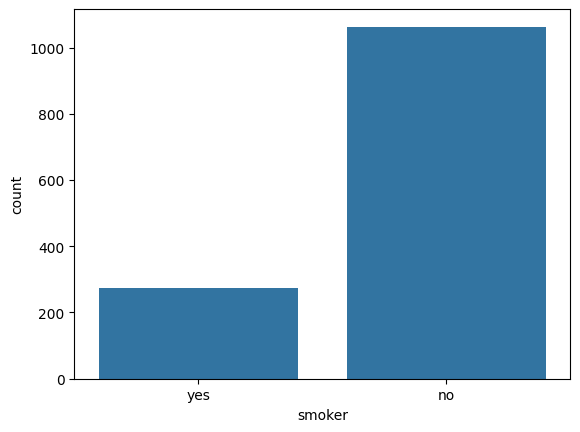

In [32]:
# control de la colonne 'smoker' 
sns.countplot(data=data, x='smoker') # tres desequilibrees

<Axes: xlabel='region', ylabel='count'>

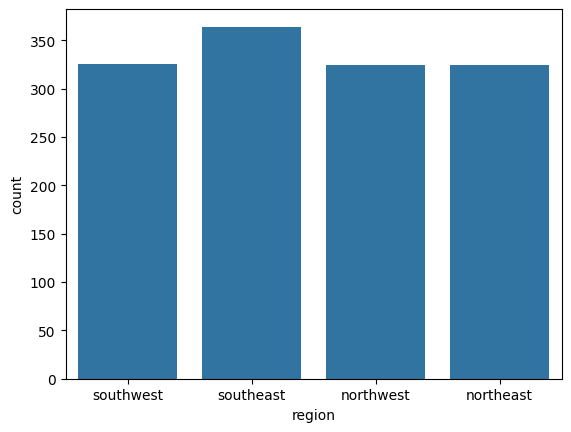

In [33]:
# control de la colonne region
sns.countplot(data=data, x="region")

In [34]:
# control de la colonne charges
data.charges.value_counts()

charges
50000.00000    7
19798.05455    1
13063.88300    1
13555.00490    1
44202.65360    1
              ..
4738.26820     1
2897.32350     1
12592.53450    1
5926.84600     1
11454.02150    1
Name: count, Length: 1331, dtype: int64

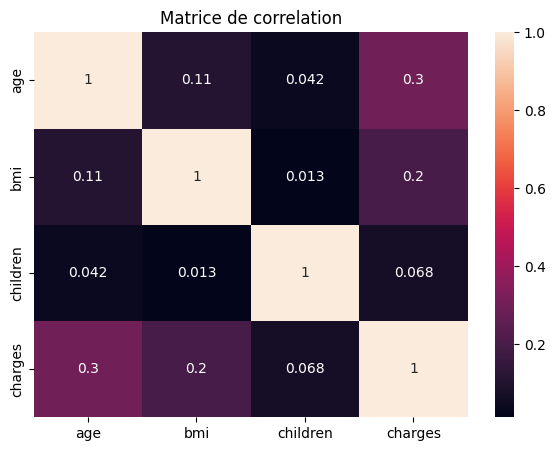

In [35]:
# gestion des correlations
_ = data.select_dtypes(["int", "float"])
plt.figure(figsize=(7,5))
plt.title("Matrice de correlation")
sns.heatmap(data=_.corr(), annot=True)
plt.show()

# Preparation des donnees pour le machine learning

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


## gestion des colonnees categorielles

In [37]:
# gestion de la colonne sex
data["sex"] = data["sex"].map({'male': 1, 'female': 0})

In [38]:
# gestion de la colonne region

# Création du mapping basé sur la fréquence
region_frequency = data["region"].value_counts(normalize=True)

# Application du mapping pour encoder la colonne "region"
data["region"] = data["region"].map(region_frequency)

In [39]:
# gestion de la colonne smoker
data["smoker"] = data["smoker"].map({'yes': 1, 'no': 0})

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,0.243082,16884.92400
1,18.0,1,33.770,1.0,0,0.272251,1725.55230
2,28.0,1,33.000,3.0,0,0.272251,4449.46200
3,33.0,1,22.705,0.0,0,0.242334,21984.47061
4,32.0,1,28.880,0.0,0,0.242334,3866.85520


In [41]:
data.region.value_counts()

region
0.242334    648
0.272251    364
0.243082    325
Name: count, dtype: int64

# Sauvegarder les donnees nettoyer

In [44]:
data.to_csv("Clean_Medicl_cost.csv", index=False)